# Gerekli Kütüphanelerin Aktarılması

In [337]:
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.options.display.max_colwidth = 150 # Büyük Tweetlerin gösterilmesi için

import os
import warnings
warnings.filterwarnings('ignore')

# Veri Okunması

In [338]:
turkcell_data = pd.read_csv("all.csv")
turkcell_data = turkcell_data.drop(['created_at', 'date', 'time', 'username'], axis = 1)
turkcell_data.columns = ['Tweets', 'Sentiment']
turkcell_data.Sentiment.replace([0, 4], ['Negative', 'Positive'], inplace = True)
turkcell_data.head()

,Tweets,Sentiment
0,Turkcell'in sahibi kim..Atarı kime acaba bu arkadaşın..,Positive
1,Benim var dışardan gelene 50 lira yaptığınız tarife 17 yıllık müşteriniz olan bana 105 lira. Değiştireceğim az kaldo @vodafone @Turkcell hangisi d...,Positive
2,@TurkcellHizmet acaba Turkcell bana da bi kalp gönderir mi ?,Positive
3,"Turkcell ceo dediki. Cezanın ayarını cezayı yazan arkadaşların kendi vicdanlarına bırakıyorum. Bizdeki 1 saat 15 dakikalık yoğunluk, kesinti değil...",Positive
4,15 günlük @TurkTelekom meceramda anladımkı ucuz etin yahnisi olmazmış keşke bizi hakkıyla öpen @Turkcell den ayrılmasaydım nasipse yarın saat 14....,Positive


# Veri Hakkında Bilgi

In [339]:
turkcell_data.describe()

,Tweets,Sentiment
count,10700,10700
unique,10644,2
top,Turkcell,Positive
freq,8,5500


In [340]:
turkcell_data['Sentiment'].value_counts()

Positive    5500
Negative    5200
Name: Sentiment, dtype: int64

In [341]:
turkcell_data['TextSize'] = [len(t) for t in turkcell_data.Tweets]
turkcell_data.tail()

,Tweets,Sentiment,TextSize
10695,Turkcell kadar leşşi bi firma görmedim amk şu korona geçsin ayağımı atarsam adam değilim,Negative,88
10696,@TurkcellHizmet turkcel yökün hediye ettiği 6 gb vermemek için direniyor! Bu ne rezilliktir? @Turkcell pic.twitter.com/mBUJY3EOyT,Negative,130
10697,@Turkcell 25 yıllık Turkcell kesintisiniz faturalı abonesiyim. Coranadan dolayı ilk defa faturamı ödeyemedim . Hattımı kesmişler . Ayıppp,Negative,138
10698,Başka operatörden Turkcell’e geçirdim 6 hattımı ama Turkcell interneti çok kötü.tekrar dönmeyi sorguluyorum kendi kendime.aramalarımı Wi-Fi destek...,Negative,272
10699,"@TurkcellHizmet Turkcell kalitesi bu mu? 30dk müşteri yetkilisine dert anlattım,asssla çözüm sunmadı, yapacak bişey yok, kalma sözü vermişsiniz di...",Negative,279


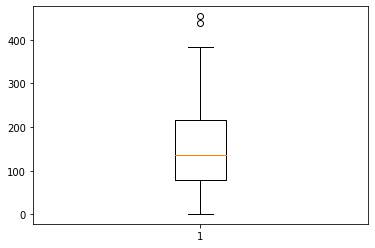

In [342]:
import matplotlib
import matplotlib.pyplot as plt

plt.boxplot(turkcell_data.TextSize) # plot TextSize column
plt.show()

# Visualize The Tweets

In [343]:
# Daha fazla bilgi edinmek için rastgele tweetlere göz atıyoruz

rand_indexs = np.random.randint(1,len(turkcell_data),50).tolist()
turkcell_data['Tweets'].iloc[rand_indexs]

5261     Mahalle yanarken @Turkcell @TurkcellHizmet yine saçını tarıyor. Aman burnunuzdan kıl aldırmayın, elbet bugünlerde geçecek. pic.twitter.com/eBjp77rYx1
4401     Sevgili @Turkcell şu modemlerinizin arka odadan salona kadar ulaşamayan wireless sinyal gücünüzü çok seviyorum. Bari modemin yanında bir sinyal ar...
5600                                                  turkcell senin ben aq salla kazandan 263829919 yıldır direkt internet vermedin nası bi şey bu ya ağlicam
5874                      Turkcell Hisse Önerisi / İş Yatırım – (08.04.2020)  https://www.hisseonerileri.com/i/turkcell-hisse-onerisi-is-yatirim-08-04-2020/ …
2893     Anlatmayı düşünmüyordum çünkü yıllardır @Turkcell kullanıcısıyım ve gerçekten ücret olarak diğer operatörlerden daha pahalı bulsam da hizmetlerind...
3540                                                                                                                               Seni seviyoruz @Turkcell ❤️
5092     Merhabalar @Turkcell sizden wıın mode

Text(0.5, 1.0, 'Dataset labels distribuition')

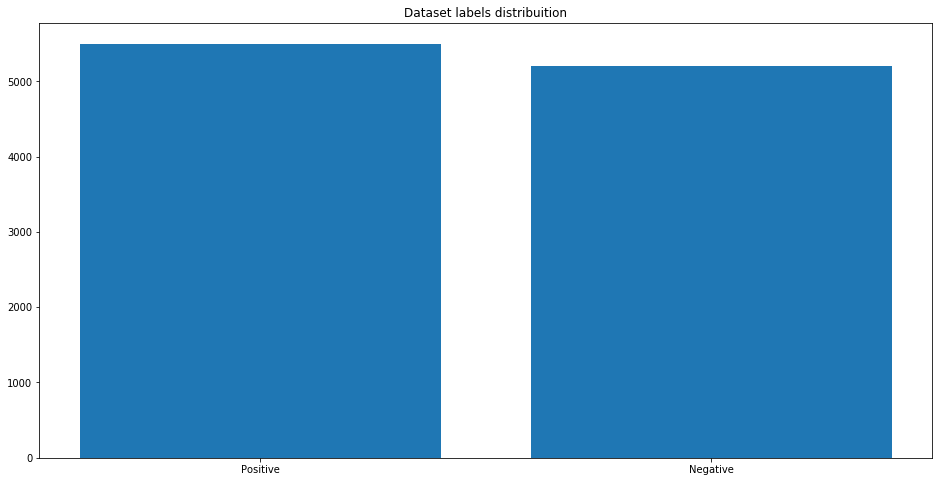

In [344]:
from collections import Counter

target_tdS = Counter(turkcell_data.Sentiment)

plt.figure(figsize=(16,8))
plt.bar(target_tdS.keys(), target_tdS.values())
plt.title("Dataset labels distribuition")

### Veri Setinde Kullanılan İfadeleri Bulacağız

In [345]:
tweets_text = turkcell_data.Tweets.str.cat()
emoticons = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emoticons_count = []
for emot in emoticons:
    emoticons_count.append((tweets_text.count(emot), emot))
sorted(emoticons_count,reverse=True)

[(883, ':/'),
 (161, ': '),
 (159, ':)'),
 (49, ':('),
 (32, ':D'),
 (11, 'X2'),
 (9, 'x2'),
 (9, ':d'),
 (5, 'x4'),
 (4, ';)'),
 (2, ":')")]

In [346]:
happy_emot = r" ([xX;:]-?[dD)]|:-?[\)]|[;:]|[:')][pP]) "
sad_emot = r" (:'?[/|\(]) "
print("Happy emoticons:", set(re.findall(happy_emot, tweets_text)))
print("Sad emoticons:", set(re.findall(sad_emot, tweets_text)))

Happy emoticons: {':D', ';', ':d', ':', ';)', ':)'}
Sad emoticons: {':(', ':/'}


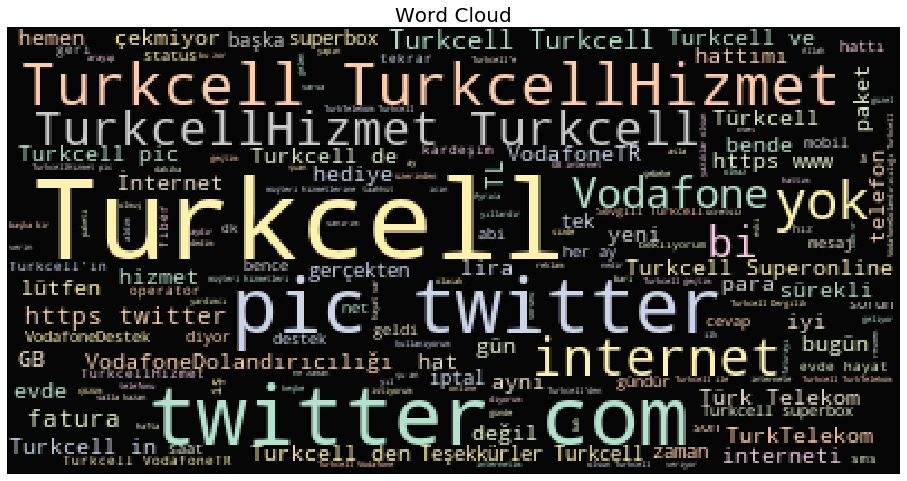

In [347]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
STOPWORDS = open('turkce-stop-words', 'r').read().split()
def wordcloud_draw(content, title):
    wc = WordCloud(background_color='black', max_words=200,
                  stopwords=STOPWORDS, max_font_size=50)
    wc.generate(" ".join(content))
    plt.figure(figsize=(16, 13))
    plt.title(title, fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=42), alpha=0.98)
    plt.axis('off')

word_cloud(turkcell_data.Tweets, "Word Cloud")

# Text Normalization

In [348]:
from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer = ToktokTokenizer()

#Setting Turkish stopwords
stopword_list = open('turkce-stop-words', 'r').read().split()

In [349]:
def most_used_words(text):
    tokens = tokenizer.tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [350]:
sorted(most_used_words(turkcell_data.Tweets.str.cat())[:150])

There is 49132 different words


['!',
 '"',
 '#Turkcell',
 '#turkcell',
 "'",
 '(',
 ')',
 ',',
 '.',
 '..',
 '...',
 '1',
 '10',
 '2',
 '20',
 '3',
 '4',
 '5',
 ':',
 '?',
 '@TurkTelekom',
 '@Turkcell',
 '@TurkcellHizmet',
 '@VodafoneTR',
 'Allah',
 'Bir',
 'Bu',
 'GB',
 'Superonline',
 'TL',
 'Telekom',
 'Turkcell',
 'Türk',
 'Vodafone',
 'a',
 'ama',
 'artık',
 'ay',
 'aynı',
 'bana',
 'başka',
 'ben',
 'beni',
 'benim',
 'bi',
 'bile',
 'bir',
 'biz',
 'bu',
 'bunu',
 'böyle',
 'cevap',
 'da',
 'daha',
 'dan',
 'de',
 'den',
 'destek',
 'devam',
 'değil',
 'diye',
 'e',
 'en',
 'evde',
 'fatura',
 'fazla',
 'gb',
 'geri',
 'geçtim',
 'gibi',
 'gün',
 'gündür',
 'güzel',
 'hala',
 'hat',
 'hediye',
 'hem',
 'her',
 'hizmet',
 'hiç',
 'i',
 'ile',
 'ilk',
 'in',
 'internet',
 'interneti',
 'iptal',
 'iyi',
 'için',
 'iş',
 'kadar',
 'ki',
 'kullanıyorum',
 'lira',
 'mesaj',
 'mi',
 'mu',
 'müşteri',
 'mı',
 'nasıl',
 'ne',
 'neden',
 'o',
 'olan',
 'olarak',
 'oldu',
 'olsun',
 'olur',
 'operatör',
 'paket',
 'para

In [351]:
mw = most_used_words(turkcell_data.Tweets.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopword_list:
        continue
    else:
        most_words.append(w)

There is 49132 different words


In [352]:
sorted(most_words[:150])

['!',
 '"',
 '#Turkcell',
 '#turkcell',
 "'",
 '(',
 ')',
 ',',
 '.',
 '..',
 '...',
 '1',
 '10',
 '15',
 '2',
 '20',
 '24',
 '3',
 '30',
 '4',
 '5',
 '6',
 ':',
 '?',
 '@SuperYardim',
 '@TurkTelekom',
 '@Turkcell',
 '@TurkcellHizmet',
 '@VodafoneDestek',
 '@VodafoneTR',
 '@turkcell',
 'Allah',
 'Ama',
 'Ben',
 'Bir',
 'Bu',
 'GB',
 'Ne',
 'Superonline',
 'TL',
 'TURKCELL',
 'Telekom',
 'Turkcell',
 'Türk',
 'Vodafone',
 'a',
 'an',
 'ay',
 'aydır',
 'aynı',
 'başka',
 'be',
 'bedeli',
 'bende',
 'bi',
 'bugün',
 'büyük',
 'cevap',
 'dakika',
 'den',
 'destek',
 'devam',
 'değil',
 'dk',
 'dönüş',
 'ev',
 'evde',
 'fatura',
 'fazla',
 'gb',
 'geldi',
 'gelen',
 'geri',
 'gerçekten',
 'geçiş',
 'geçtim',
 'gün',
 'gündür',
 'günlerde',
 'güzel',
 'hafta',
 'hat',
 'hattı',
 'hattım',
 'hattımı',
 'hayat',
 'hayata',
 'hediye',
 'hemen',
 'hizmet',
 'hizmetleri',
 'hız',
 'ilk',
 'in',
 'internet',
 'internete',
 'interneti',
 'iptal',
 'istiyorum',
 'iyi',
 'iş',
 'kere',
 'kullanıyorum

# PreProcess

In [353]:
turkcell_data['Tweets']

0                                                                                                      Turkcell'in sahibi kim..Atarı kime acaba bu arkadaşın..
1        Benim var dışardan gelene 50 lira yaptığınız tarife 17 yıllık müşteriniz olan bana 105 lira. Değiştireceğim az kaldo @vodafone @Turkcell hangisi d...
2                                                                                               @TurkcellHizmet  acaba Turkcell bana da bi kalp gönderir mi ? 
3        Turkcell ceo dediki. Cezanın ayarını cezayı yazan arkadaşların kendi vicdanlarına bırakıyorum. Bizdeki 1 saat 15 dakikalık yoğunluk, kesinti değil...
4        15 günlük @TurkTelekom meceramda anladımkı ucuz etin yahnisi olmazmış keşke  bizi hakkıyla öpen @Turkcell den ayrılmasaydım nasipse yarın saat 14....
                                                                                 ...                                                                          
10695                                         

In [354]:
#Remove the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

turkcell_data['Tweets'] = turkcell_data['Tweets'].apply(denoise_text)

In [355]:
turkcell_data['Tweets']

0                                                                                                      Turkcell'in sahibi kim..Atarı kime acaba bu arkadaşın..
1        Benim var dışardan gelene 50 lira yaptığınız tarife 17 yıllık müşteriniz olan bana 105 lira. Değiştireceğim az kaldo @vodafone @Turkcell hangisi d...
2                                                                                               @TurkcellHizmet  acaba Turkcell bana da bi kalp gönderir mi ? 
3        Turkcell ceo dediki. Cezanın ayarını cezayı yazan arkadaşların kendi vicdanlarına bırakıyorum. Bizdeki 1 saat 15 dakikalık yoğunluk, kesinti değil...
4        15 günlük @TurkTelekom meceramda anladımkı ucuz etin yahnisi olmazmış keşke  bizi hakkıyla öpen @Turkcell den ayrılmasaydım nasipse yarın saat 14....
                                                                                 ...                                                                          
10695                                         

In [356]:
def stemWord(text):
    return text.lower()

#Remove usernames
def removeUsernames(text):
    return re.sub('@[^\s]+', '', text)

#Remove hashtags
def removeHashtags(text):
    return re.sub(r'#[^\s]+', ' ', text)

#Remove punctuation
def removePunctuation(text):
    return re.sub(r'[^\w\s]', ' ', text)

#Remove single character
def singleCharacterRemove(text):
    return re.sub(r'(?:^| )\w(?:$| )', ' ', text)
                  
#Remove emoji
def stripEmoji(text):
    emoji = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return emoji.sub(r'', text)

def splitIntoStem(text):
    text = stemWord(text)
    text = removeUsernames(text)
    text = removeHashtags(text)
    text = removePunctuation(text)
    text = singleCharacterRemove(text)
    text = stripEmoji(text)
    return text


turkcell_data['Tweets'] = turkcell_data['Tweets'].apply(splitIntoStem)

In [357]:
turkcell_data['Tweets']

0                                                                                                      turkcell in sahibi kim  atarı kime acaba bu arkadaşın  
1                 benim var dışardan gelene 50 lira yaptığınız tarife 17 yıllık müşteriniz olan bana 105 lira  değiştireceğim az kaldo   hangisi daha uygunsa 
2                                                                                                                acaba turkcell bana da bi kalp gönderir mi   
3        turkcell ceo dediki  cezanın ayarını cezayı yazan arkadaşların kendi vicdanlarına bırakıyorum  bizdeki saat 15 dakikalık yoğunluk  kesinti değil  ...
4        15 günlük  meceramda anladımkı ucuz etin yahnisi olmazmış keşke  bizi hakkıyla öpen  den ayrılmasaydım nasipse yarın saat 14 26 suları itibari ile...
                                                                                 ...                                                                          
10695                                         

In [358]:
# pic.twitter
def picTwitter(text):
    pic_pat = r'pic.[^ ]+'
    text = re.sub(pic_pat, '', text)
    return text
    
turkcell_data['Tweets'] = turkcell_data['Tweets'].apply(picTwitter)

# pic.twitter devam
def picTwitter2(text):
    pic_pat2 = r'com.[^ ]+'
    text = re.sub(pic_pat2, '', text)
    return text

turkcell_data['Tweets'] = turkcell_data['Tweets'].apply(picTwitter2)

In [359]:
turkcell_data['Tweets']

0                                                                                                      turkcell in sahibi kim  atarı kime acaba bu arkadaşın  
1                 benim var dışardan gelene 50 lira yaptığınız tarife 17 yıllık müşteriniz olan bana 105 lira  değiştireceğim az kaldo   hangisi daha uygunsa 
2                                                                                                                acaba turkcell bana da bi kalp gönderir mi   
3        turkcell ceo dediki  cezanın ayarını cezayı yazan arkadaşların kendi vicdanlarına bırakıyorum  bizdeki saat 15 dakikalık yoğunluk  kesinti değil  ...
4        15 günlük  meceramda anladımkı ucuz etin yahnisi olmazmış keşke  bizi hakkıyla öpen  den ayrılmasaydım nasipse yarın saat 14 26 suları itibari ile...
                                                                                 ...                                                                          
10695                                         

In [360]:
turkcell_data.head()

,Tweets,Sentiment,TextSize
0,turkcell in sahibi kim atarı kime acaba bu arkadaşın,Positive,55
1,benim var dışardan gelene 50 lira yaptığınız tarife 17 yıllık müşteriniz olan bana 105 lira değiştireceğim az kaldo hangisi daha uygunsa,Positive,158
2,acaba turkcell bana da bi kalp gönderir mi,Positive,62
3,turkcell ceo dediki cezanın ayarını cezayı yazan arkadaşların kendi vicdanlarına bırakıyorum bizdeki saat 15 dakikalık yoğunluk kesinti değil ...,Positive,258
4,15 günlük meceramda anladımkı ucuz etin yahnisi olmazmış keşke bizi hakkıyla öpen den ayrılmasaydım nasipse yarın saat 14 26 suları itibari ile...,Positive,225


In [361]:
'''from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer

def remove_stop(text, is_lower_case = True):
    tokens = WordPunctTokenizer(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
turkcell_data['Tweets'] = turkcell_data['Tweets'].apply(remove_stopwords)'''

"from nltk.tokenize import word_tokenize\nfrom nltk.tokenize import WordPunctTokenizer\n\ndef remove_stop(text, is_lower_case = True):\n    tokens = WordPunctTokenizer(text)\n    tokens = [token.strip() for token in tokens]\n    if is_lower_case:\n        filtered_tokens = [token for token in tokens if token not in stopword_list]\n    else:\n        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]\n    filtered_text = ' '.join(filtered_tokens)    \n    return filtered_text\n\n#Apply function on review column\nturkcell_data['Tweets'] = turkcell_data['Tweets'].apply(remove_stopwords)"

In [362]:
#turkcell_data.head()

# Removing StopWords

In [363]:
#set stopwords to turkish
stop = set(stopword_list)

#removing the stopwords
def remove_stopwords(text, is_lower_case=True):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
turkcell_data['Tweets'] = turkcell_data['Tweets'].apply(remove_stopwords)

In [364]:
turkcell_data.head()

,Tweets,Sentiment,TextSize
0,turkcell in sahibi atarı arkadaşın,Positive,55
1,dışardan gelene 50 lira yaptığınız tarife 17 yıllık müşteriniz 105 lira değiştireceğim kaldo uygunsa,Positive,158
2,turkcell bi kalp gönderir,Positive,62
3,turkcell ceo dediki cezanın ayarını cezayı yazan arkadaşların vicdanlarına bırakıyorum bizdeki saat 15 dakikalık yoğunluk kesinti değil yoğunluk k...,Positive,258
4,15 günlük meceramda anladımkı ucuz etin yahnisi olmazmış keşke hakkıyla öpen den ayrılmasaydım nasipse yarın saat 14 26 suları itibari bıraktığımı...,Positive,225


# Text Stemming

In [365]:
from snowballstemmer import TurkishStemmer
turkStem = TurkishStemmer()

#Stemming the text
def simple_stemmer(text):
    ss = TurkishStemmer()
    text= ' '.join([ss.stemWord(word) for word in text.split()])
    return text

#Apply function on review column
turkcell_data['Tweets'] = turkcell_data['Tweets'].apply(simple_stemmer)

In [366]:
turkcell_data['NewTextSize'] = [len(t) for t in turkcell_data.Tweets]
turkcell_data

,Tweets,Sentiment,TextSize,NewTextSize
0,turkcell in sahip atar arkadaş,Positive,55,30
1,dışar gele 50 lira yaptık tarif 17 yıllık müşter 105 lira değiştirecek kaldo uygu,Positive,158,81
2,turkcell bi kalp gönderir,Positive,62,25
3,turkcell ceo dedik ceza ayar ceza yaza arkadaş vicdan bırakıyor biz saat 15 dakikalık yoğunluk kes değil yoğunluk karşı 27 saat kes el vicdan koy ...,Positive,258,167
4,15 günlük mecera anladımkı uç et yahnis olmaz keşke hakkı öpe den ayrılmas nasip yar saat 14 26 su itibar bıraktık yer deva edicez iyik var,Positive,225,139
...,...,...,...,...
10695,turkcell leşşi bi firma görmedi amk koro geç ayak atar ada değil,Negative,88,64
10696,turkcel yök hedi gb vermemek direniyor rezillik,Negative,130,47
10697,25 yıllık turkcell kesinti fatural abones corana ilk fatura ödeyemedi hatt kes ayıppp,Negative,138,85
10698,başka operatör turkcell geçir hatt turkcell internet köt tekrar dönme sorguluyor kendi arama wi fi destekli yapıyor çek güç konu yardı olacak mı e...,Negative,272,194


# Labeling the sentiment text

In [367]:
turkcell_data.Sentiment.replace(['Negative', 'Positive'], [0, 1], inplace = True)
turkcell_data.head()

,Tweets,Sentiment,TextSize,NewTextSize
0,turkcell in sahip atar arkadaş,1,55,30
1,dışar gele 50 lira yaptık tarif 17 yıllık müşter 105 lira değiştirecek kaldo uygu,1,158,81
2,turkcell bi kalp gönderir,1,62,25
3,turkcell ceo dedik ceza ayar ceza yaza arkadaş vicdan bırakıyor biz saat 15 dakikalık yoğunluk kes değil yoğunluk karşı 27 saat kes el vicdan koy ...,1,258,167
4,15 günlük mecera anladımkı uç et yahnis olmaz keşke hakkı öpe den ayrılmas nasip yar saat 14 26 su itibar bıraktık yer deva edicez iyik var,1,225,139


# Train and Test

In [368]:
from sklearn.model_selection import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set


sent = turkcell_data['Sentiment']
tw = turkcell_data['Tweets']

X_train, X_test, y_train, y_test = train_test_split(tw, sent, test_size = 0.20, random_state= 1) # split the data into traing and testing set where ratio is 80:20


# X_train is the tweets of training data, X_test is the testing tweets which we have to predict, y_train is the sentiments of tweets in the traing data and y_test is the sentiments of the tweets  which we will use to measure the accuracy of the model

# Bag of Words

In [369]:
from sklearn.feature_extraction.text import CountVectorizer

#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed train reviews
cv_train_tweets=cv.fit_transform(X_train)

#transformed test reviews
cv_test_tweets=cv.transform(X_test)

print('BOW_cv_train:',cv_train_tweets.shape)
print('BOW_cv_test:',cv_test_tweets.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (8560, 170489)
BOW_cv_test: (2140, 170489)


In [370]:
s = cv_train_tweets[1]
print(s)

  (0, 128523)	1
  (0, 110028)	1
  (0, 48828)	1
  (0, 80389)	1
  (0, 81674)	1
  (0, 15311)	1
  (0, 128524)	1
  (0, 123281)	1
  (0, 110029)	1
  (0, 5945)	1
  (0, 78212)	1
  (0, 48829)	1
  (0, 80390)	1
  (0, 81675)	1
  (0, 98761)	1


In [371]:
ss = cv_test_tweets[1]
print(ss)

  (0, 56274)	1
  (0, 70185)	1
  (0, 126527)	1
  (0, 126528)	1


# Term Frequency-Inverse Document Frequency model (TFIDF)

In [372]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_tweets = tv.fit_transform(X_train)
#transformed test reviews
tv_test_tweets = tv.transform(X_test)
print('Tfidf_train:',tv_train_tweets.shape)
print('Tfidf_test:',tv_test_tweets.shape)

Tfidf_train: (8560, 170489)
Tfidf_test: (2140, 170489)


In [373]:
s = tv_train_tweets[1]
print(s)

  (0, 98761)	0.2581988897471611
  (0, 81675)	0.2581988897471611
  (0, 80390)	0.2581988897471611
  (0, 48829)	0.2581988897471611
  (0, 78212)	0.2581988897471611
  (0, 5945)	0.2581988897471611
  (0, 110029)	0.2581988897471611
  (0, 123281)	0.2581988897471611
  (0, 128524)	0.2581988897471611
  (0, 15311)	0.2581988897471611
  (0, 81674)	0.2581988897471611
  (0, 80389)	0.2581988897471611
  (0, 48828)	0.2581988897471611
  (0, 110028)	0.2581988897471611
  (0, 128523)	0.2581988897471611


In [374]:
ss = tv_test_tweets[1]
print(ss)

  (0, 126528)	0.5
  (0, 126527)	0.5
  (0, 70185)	0.5
  (0, 56274)	0.5


# Modelling the Dataset

In [375]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1.1,random_state=42)

#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_tweets,y_train)
print(lr_bow)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_tweets,y_train)
print(lr_tfidf)

LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Logistic regression model performane on test dataset

In [381]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_tweets)
print(lr_bow_predict)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_tweets)
print(lr_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]


## Accuracy of the model

In [382]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.6327102803738318
lr_tfidf_score : 0.6135514018691589


## Print the classification report

In [384]:
#Classification report for bag of words 
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.71      0.42      0.53      1053
    Negative       0.60      0.84      0.70      1087

    accuracy                           0.63      2140
   macro avg       0.66      0.63      0.61      2140
weighted avg       0.66      0.63      0.62      2140

              precision    recall  f1-score   support

    Positive       0.71      0.36      0.48      1053
    Negative       0.58      0.85      0.69      1087

    accuracy                           0.61      2140
   macro avg       0.64      0.61      0.59      2140
weighted avg       0.64      0.61      0.59      2140



## Confusion matrix

In [385]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,lr_bow_predict,labels=[1,0])
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[908 179]
 [607 446]]
[[929 158]
 [669 384]]


## SGDClassifier

In [386]:
#training the linear svm
svm = SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#fitting the svm for bag of words
svm_bow = svm.fit(cv_train_tweets,y_train)
print(svm_bow)

#fitting the svm for tfidf features
svm_tfidf = svm.fit(tv_train_tweets,y_train)
print(svm_tfidf)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


## Model performance on test data

In [387]:
#Predicting the model for bag of words
svm_bow_predict = svm.predict(cv_test_tweets)
print(svm_bow_predict)

#Predicting the model for tfidf features
svm_tfidf_predict = svm.predict(tv_test_tweets)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]


## Accuracy of the model

In [388]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(y_test,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(y_test,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.6434579439252337
svm_tfidf_score : 0.6350467289719626


## Print the classification report

In [389]:
#Classification report for bag of words 
svm_bow_report=classification_report(y_test,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

#Classification report for tfidf features
svm_tfidf_report=classification_report(y_test,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.68      0.52      0.59      1053
    Negative       0.62      0.76      0.69      1087

    accuracy                           0.64      2140
   macro avg       0.65      0.64      0.64      2140
weighted avg       0.65      0.64      0.64      2140

              precision    recall  f1-score   support

    Positive       0.68      0.48      0.57      1053
    Negative       0.61      0.78      0.68      1087

    accuracy                           0.64      2140
   macro avg       0.65      0.63      0.63      2140
weighted avg       0.65      0.64      0.63      2140



# Plot the confusion matrix

In [393]:
#confusion matrix for bag of words
cm_bow = confusion_matrix(y_test,svm_bow_predict,labels=[0,1])
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf = confusion_matrix(y_test,svm_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[547 506]
 [257 830]]
[[510 543]
 [238 849]]


# Multinomial Naive Bayes for bag of words and tfidf features

In [395]:
from sklearn.naive_bayes import MultinomialNB

#training the model
mnb = MultinomialNB()

#fitting the svm for bag of words
mnb_bow = mnb.fit(cv_train_tweets,y_train)
print(mnb_bow)

#fitting the svm for tfidf features
mnb_tfidf = mnb.fit(tv_train_tweets,y_train)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


## Model performance on test data

In [396]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_tweets)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_tweets)
print(mnb_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]


## Accuracy of the model

In [397]:
#Accuracy score for bag of words
mnb_bow_score = accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

#Accuracy score for tfidf features
mnb_tfidf_score = accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.6364485981308411
mnb_tfidf_score : 0.6322429906542056


## Print the classification report

In [398]:
#Classification report for bag of words 
mnb_bow_report = classification_report(y_test,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)

#Classification report for tfidf features
mnb_tfidf_report = classification_report(y_test,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.68      0.50      0.57      1053
    Negative       0.61      0.77      0.68      1087

    accuracy                           0.64      2140
   macro avg       0.65      0.63      0.63      2140
weighted avg       0.64      0.64      0.63      2140

              precision    recall  f1-score   support

    Positive       0.68      0.48      0.56      1053
    Negative       0.61      0.78      0.68      1087

    accuracy                           0.63      2140
   macro avg       0.64      0.63      0.62      2140
weighted avg       0.64      0.63      0.62      2140



## Plot the confusion matrix

In [399]:
#confusion matrix for bag of words
cm_bow = confusion_matrix(y_test,mnb_bow_predict,labels=[0,1])
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf = confusion_matrix(y_test,mnb_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[526 527]
 [251 836]]
[[502 551]
 [236 851]]


## Word cloud for positive review words

<function matplotlib.pyplot.show(*args, **kw)>

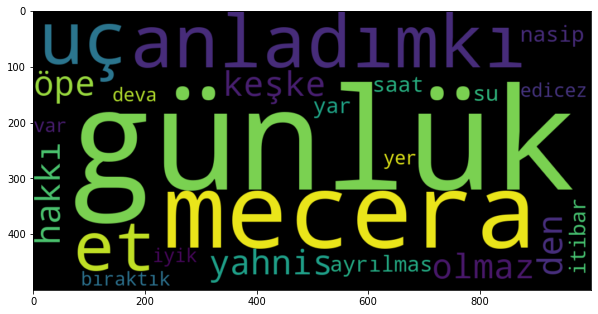

In [407]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text = X_train[4]
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words = WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

## Word cloud for negative review words

<function matplotlib.pyplot.show(*args, **kw)>

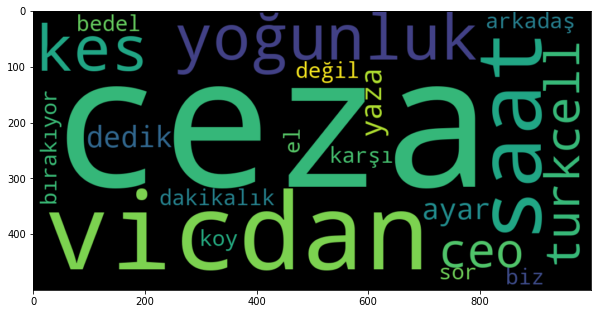

In [406]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text = X_train[3]
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words = WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [377]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = lr, X = tv_train_tweets, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.5155373831775701

In [378]:
y_pred_lg = lr.predict(tv_test_tweets)  # predict the sentiments of testing data tweets

In [379]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_lg) # measure the accuracy of our model on the testing data


0.6135514018691589

In [380]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_lg) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[384, 669],
       [158, 929]])

In [408]:
msg_test2=["süperonline kullandıkça mutlu oluyorum"]
y_pred_class = svm.predict(msg_test2)
print(y_pred_class)

ValueError: Expected 2D array, got 1D array instead:
array=['süperonline kullandıkça mutlu oluyorum '].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.